# 2.32 Pandas - Простейшие операции

In [1]:
# подключение пакетов
import pandas as pd, numpy as np
# игнорирование предостережений
import warnings
warnings.filterwarnings('ignore')
# подключение дополнительных возможностей Jupyter
from IPython.display import display, HTML

In [2]:
# эффектное представление данных средствами гипертекстовой разметки
def pd_style():
    return [dict(selector='th',
                 props=[('font-size','10pt'),('min-width','10px')]),
            dict(selector='td',
                 props=[('padding','0em 0em'),('min-width','10px')]),
            dict(selector='tr:hover th:hover',
                 props=[('font-size','11pt'),('max-width','25px'),
                        ('text-shadow','3px 3px 3px #aaa')]),
            dict(selector='tr:hover td:hover',
                 props=[('font-size','10pt'),('max-width','25px'),
                        ('text-shadow','3px 3px 3px #aaa')])]

## Загрузка данных для упражнений

In [3]:
# тренировка на общеизвестных данных
from sklearn import datasets
boston_data = datasets.load_boston()
columns = boston_data.feature_names
boston = pd.DataFrame(boston_data.data,columns=columns)
boston['MEDV'] = boston_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#@title Создание гипертекстовой таблицы с описанием данных
from IPython.display import display, HTML
display(HTML("""
<style>
@import 'https://fonts.googleapis.com/css?family=Akronim|Aladin';
.tab1 {width:50%; background-color:#333; font-family:Aladin; font-size:120%;}
.tr_head1 th {font-family:Akronim; color:whitesmoke;}
.tr_head1 th:hover,.tab1 tr:hover td:hover {text-shadow:3px 3px 3px #000}
</style>
<table class='tab1'>
  <tr class='tr_head1'><th>Attribute</th><th>Description</th></tr>
  <tr><td style='color:#F898C8;'><center>CRIM</center></td><td style='color:#F898C8;'>
    <left>per capita crime rate by town</left></td></tr>
  <tr><td style='color:#E91E63;'><center>ZN</center></td><td style='color:#E91E63;'>
    <left>proportion of residential land zoned for lots over 25,000 sq.ft.</left></td></tr>
  <tr><td style='color:#D62518;'><center>INDUS</center></td><td style='color:#D62518;'>
    <left>proportion of non-retail business acres per town</left></td></tr>
  <tr><td style='color:#AD0000;'><center>CHAS</center></td><td style='color:#AD0000;'>
    <left>Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</left></td></tr>
  <tr><td style='color:#FA7A00;'><center>NOX</center></td><td style='color:#FA7A00;'>
    <left>nitric oxides concentration (parts per 10 million)</left></td></tr> 
  <tr><td style='color:#FED85D;'><center>RM</center></td><td style='color:#FED85D;'>
    <left>average number of rooms per dwelling</left></td></tr> 
  <tr><td style='color:#91E351;'><center>AGE</center></td><td style='color:#91E351;'>
    <left>proportion of owner-occupied units built prior to 1940</left></td></tr> 
  <tr><td style='color:#00D8A0;'><center>DIS</center></td><td style='color:#00D8A0;'>
    <left>weighted distances to five Boston employment centres</left></td></tr> 
  <tr><td style='color:#1CAC78;'><center>RAD</center></td><td style='color:#1CAC78;'>
    <left>index of accessibility to radial highways</left></td></tr>
  <tr><td style='color:#009C91;'><center>TAX</center></td><td style='color:#009C91;'>
    <left>full-value property-tax rate per 10,000 USD</left></td></tr>
  <tr><td style='color:#1AADE0;'><center>PTRATIO</center></td><td style='color:#1AADE0;'>
    <left>pupil-teacher ratio by town</left></td></tr>
  <tr><td style='color:#0079DD;'><center>B</center></td><td style='color:#0079DD;'>
    <left>1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</left></td></tr>
  <tr><td style='color:#3355FF;'><center>LSTAT</center></td><td style="color:#3355FF;">
    <left>% lower status of the population</left></td></tr> 
  <tr><td style='color:#7855EE;'><center>MEDV</center></td><td style='color:#7855EE;'>
    <left>Median value of owner-occupied homes in 1000 USD</left></td></tr>
</table>"""))

Attribute,Description
CRIM,per capita crime rate by town
ZN,"proportion of residential land zoned for lots over 25,000 sq.ft."
INDUS,proportion of non-retail business acres per town
CHAS,Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX,nitric oxides concentration (parts per 10 million)
RM,average number of rooms per dwelling
AGE,proportion of owner-occupied units built prior to 1940
DIS,weighted distances to five Boston employment centres
RAD,index of accessibility to radial highways
TAX,"full-value property-tax rate per 10,000 USD"


In [5]:
# тренировка на реальных данных
url='https://raw.githubusercontent.com/'+\
    'OlgaBelitskaya/machine_learning_engineer_nd009/'+\
    'master/Machine_Learning_Engineer_ND_P3/customers.csv'
customers = pd.read_csv(url)
# удаление записей с отсутствующими значениями
customers = customers.dropna()
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Обращение к элементам объектов

In [6]:
# сведения о строках и столбцах
boston.columns, boston.index

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT', 'MEDV'],
       dtype='object'), RangeIndex(start=0, stop=506, step=1))

In [7]:
# обращение к значениям и превращение в массив numpy
boston.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [8]:
# размерность cutomers и количество уникальных элементов в столбце Milk
customers.shape, customers.Milk.nunique()

((440, 8), 421)

In [9]:
df1 = pd.DataFrame({'x':[1,3,2,8],'y':[2,4,1,5],'z':[3,4,5,7]})
display(df1)
# удаление строки
df1.drop(1, axis=0, inplace=True)
display(df1)
# удаление столбца
del df1['x']
# тот же результат
# df1.drop('x', axis=1, inplace=True)
df1

,x,y,z
0,1,2,3
1,3,4,4
2,2,1,5
3,8,5,7


,x,y,z
0,1,2,3
2,2,1,5
3,8,5,7


,y,z
0,2,3
2,1,5
3,5,7


In [10]:
# поменять местами столбцы
df1.loc[:,['y','z']] = df1[['z','y']].to_numpy()
df1

,y,z
0,3,2
2,5,1
3,7,5


In [11]:
# создание копии с переименованием столбцов оригинала
df2 = df1.rename(columns={'z':'x'})
display(df1)

,y,z
0,3,2
2,5,1
3,7,5


In [12]:
display(df2)
# изменение текущей рамки данных
df2['y'] = [8,12,np.nan]
df2.rename(columns={'x':'xx'},inplace=True)
# не влияет на оригинальную рамку данных
display(df2, df1)

,y,x
0,3,2
2,5,1
3,7,5


,y,xx
0,8.0,2
2,12.0,1
3,NaN,5


,y,z
0,3,2
2,5,1
3,7,5


In [13]:
# первая и последняя строка
display(df2[:1], df2[-1:])

,y,xx
0,8.0,2


,y,xx
3,NaN,5


In [14]:
# индексы максимальных / минимальных значений в каждом столбце
df3 = pd.DataFrame(
    {'consumption': [10.51, 103.11, 55.48],
     'co2_emissions': [37.2, 19.66, 1712]},
     index=['Pork', 'Wheat Products', 'Beef'])
df3.idxmax()

consumption      Wheat Products
co2_emissions              Beef
dtype: object

In [15]:
# индексы максимальных / минимальных значений в каждой строке
n = 7
df4 = pd.DataFrame(
    np.random.randn(n, 5),
    index=pd.date_range('9/19/2022', periods=n),
    columns=[f'col{i+1}' for i in range(5)])
df4.idxmax(axis="columns")

2022-09-19    col4
2022-09-20    col3
2022-09-21    col4
2022-09-22    col1
2022-09-23    col3
2022-09-24    col3
2022-09-25    col5
Freq: D, dtype: object

In [16]:
# сортировка по наименьшим/наибольшим значениям в столбце
df4.nsmallest(5, 'col1'), df4.nlargest(5, 'col2')

(                col1      col2      col3      col4      col5
 2022-09-25 -1.206452 -0.097077 -0.453978 -0.766994  0.211958
 2022-09-20 -1.053081 -0.056387  1.626367  1.528263  0.858635
 2022-09-24 -0.987358 -0.517754  1.063796  0.406425 -0.775752
 2022-09-23 -0.255148 -1.410266  0.354239 -1.252233 -1.547502
 2022-09-21 -0.220511 -1.051184 -0.679279 -0.009806 -0.716589,
                 col1      col2      col3      col4      col5
 2022-09-20 -1.053081 -0.056387  1.626367  1.528263  0.858635
 2022-09-25 -1.206452 -0.097077 -0.453978 -0.766994  0.211958
 2022-09-24 -0.987358 -0.517754  1.063796  0.406425 -0.775752
 2022-09-19 -0.124802 -0.573939 -1.064412  0.978185 -1.097211
 2022-09-22  1.861665 -0.833368  0.046901  0.395666  0.804753)

In [17]:
# сортировка по столбцу Milk в порядке убывания
customers.sort_values(by='Milk', ascending=False).head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,2,3,22925,73498,32114,987,20070,903
47,2,3,44466,54259,55571,7782,24171,6465
85,2,3,16117,46197,92780,1026,40827,2944
183,1,3,36847,43950,20170,36534,239,47943
61,2,3,35942,38369,59598,3254,26701,2017


In [18]:
# наименования / пояснения для данных и индексов
df4.name = 'online courses'
df4.index.name = 'start-end dates'
print(df4.name)
df4

online courses


,col1,col2,col3,col4,col5
start-end dates,,,,,
2022-09-19,-0.124802,-0.573939,-1.064412,0.978185,-1.097211
2022-09-20,-1.053081,-0.056387,1.626367,1.528263,0.858635
2022-09-21,-0.220511,-1.051184,-0.679279,-0.009806,-0.716589
2022-09-22,1.861665,-0.833368,0.046901,0.395666,0.804753
2022-09-23,-0.255148,-1.410266,0.354239,-1.252233,-1.547502
2022-09-24,-0.987358,-0.517754,1.063796,0.406425,-0.775752
2022-09-25,-1.206452,-0.097077,-0.453978,-0.766994,0.211958


In [19]:
# значение / замена элемента
df4.at['2022-09-23','col3'] = .999999 # по наименованиям
df4.iat[1,0] = pd.Timestamp('20220101') # по номерам
df4

,col1,col2,col3,col4,col5
start-end dates,,,,,
2022-09-19,-0.124802,-0.573939,-1.064412,0.978185,-1.097211
2022-09-20,2022-01-01 00:00:00,-0.056387,1.626367,1.528263,0.858635
2022-09-21,-0.220511,-1.051184,-0.679279,-0.009806,-0.716589
2022-09-22,1.861665,-0.833368,0.046901,0.395666,0.804753
2022-09-23,-0.255148,-1.410266,0.999999,-1.252233,-1.547502
2022-09-24,-0.987358,-0.517754,1.063796,0.406425,-0.775752
2022-09-25,-1.206452,-0.097077,-0.453978,-0.766994,0.211958


In [20]:
# df4.at['2022-09-23','col3'] # не работает
df4.at[pd.Timestamp('20220923'),'col3']

0.999999

In [21]:
# значение / замена элемента
df4.loc['2022-09-24','col3'] = .888888 # по наименованиям
df4.iloc[2,0] = pd.Timestamp('20220102') # по номерам
df4

,col1,col2,col3,col4,col5
start-end dates,,,,,
2022-09-19,-0.124802,-0.573939,-1.064412,0.978185,-1.097211
2022-09-20,2022-01-01 00:00:00,-0.056387,1.626367,1.528263,0.858635
2022-09-21,2022-01-02 00:00:00,-1.051184,-0.679279,-0.009806,-0.716589
2022-09-22,1.861665,-0.833368,0.046901,0.395666,0.804753
2022-09-23,-0.255148,-1.410266,0.999999,-1.252233,-1.547502
2022-09-24,-0.987358,-0.517754,0.888888,0.406425,-0.775752
2022-09-25,-1.206452,-0.097077,-0.453978,-0.766994,0.211958


In [22]:
# переиндексация (изменяет порядок индексов, но не значения)
df4 = df4.reindex(index=df4.index[::-1])
df4

,col1,col2,col3,col4,col5
start-end dates,,,,,
2022-09-25,-1.206452,-0.097077,-0.453978,-0.766994,0.211958
2022-09-24,-0.987358,-0.517754,0.888888,0.406425,-0.775752
2022-09-23,-0.255148,-1.410266,0.999999,-1.252233,-1.547502
2022-09-22,1.861665,-0.833368,0.046901,0.395666,0.804753
2022-09-21,2022-01-02 00:00:00,-1.051184,-0.679279,-0.009806,-0.716589
2022-09-20,2022-01-01 00:00:00,-0.056387,1.626367,1.528263,0.858635
2022-09-19,-0.124802,-0.573939,-1.064412,0.978185,-1.097211


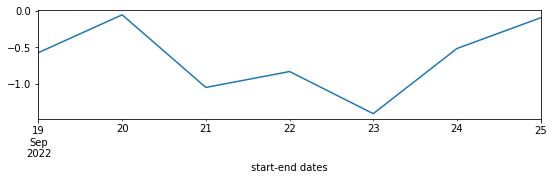

In [23]:
# обращение как к атрибутам
df4.col2.plot(figsize=(9,2));

In [24]:
# df4.col6 = list(range(7)) # не работает, если столбца не было
df4['col6'] = list(range(7))
df4

,col1,col2,col3,col4,col5,col6
start-end dates,,,,,,
2022-09-25,-1.206452,-0.097077,-0.453978,-0.766994,0.211958,0
2022-09-24,-0.987358,-0.517754,0.888888,0.406425,-0.775752,1
2022-09-23,-0.255148,-1.410266,0.999999,-1.252233,-1.547502,2
2022-09-22,1.861665,-0.833368,0.046901,0.395666,0.804753,3
2022-09-21,2022-01-02 00:00:00,-1.051184,-0.679279,-0.009806,-0.716589,4
2022-09-20,2022-01-01 00:00:00,-0.056387,1.626367,1.528263,0.858635,5
2022-09-19,-0.124802,-0.573939,-1.064412,0.978185,-1.097211,6


In [25]:
# переиндексация с заполнением
s = pd.Series([10,20,60], index=[1,2,6])
s.reindex(index=list(range(10)), method='ffill')

0     NaN
1    10.0
2    20.0
3    20.0
4    20.0
5    20.0
6    60.0
7    60.0
8    60.0
9    60.0
dtype: float64

In [26]:
# обращение к столбцам по номерам
numeric_features=boston.columns[[0,2,4,5,6,7,9,10,11,12,13]]
# статистика для численных значений
stats = boston.describe().transpose()
# копия рамки данных
dfn = boston.copy()
# Z-нормализация значений
for nc in numeric_features:
    mean=stats.loc[nc,'mean']; std=stats.loc[nc,'std']
    dfn.loc[:,nc]=(dfn.loc[:,nc]-mean)/std
# стилизация столбцов
dfn[['RM','LSTAT','AGE','MEDV']].tail(10).style.bar(
    align='mid',color=['#7676ff','#ff7676'],
    subset=['RM','LSTAT','AGE','MEDV'])\
    .set_precision(4)\
    .set_table_styles(pd_style())

,RM,LSTAT,AGE,MEDV
496,-1.2733,1.1885,0.1537,-0.3080
497,-0.6983,0.2026,0.0719,-0.4602
498,-0.3781,0.0374,-0.1163,-0.1449
499,-1.0185,0.3427,0.1750,-0.5472
500,-0.3667,0.2348,0.3952,-0.6233
501,0.4389,-0.4177,0.0187,-0.0144
502,-0.2343,-0.5004,0.2886,-0.2102
503,0.9840,-0.9821,0.7967,0.1487
504,0.7250,-0.8644,0.7363,-0.0579
505,-0.3624,-0.6684,0.4343,-1.1561


In [27]:
# изменение типа данных в столбцах
boston[['CHAS','RAD']] = boston[['CHAS','RAD']].astype('int64')

In [28]:
# таблица со статистическими сведениями о переменных
stats

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Применение логических операторов

In [29]:
# поэлементное сравнение рамок данных
df1 = pd.DataFrame({'x':[1,3,2],'y':[2,4,1],'z':[1,0,1]})
df2 = pd.DataFrame({'x':[3,1,2],'y':[5,2,2],'z':[2,1,1]})
display(df1, df2)
print(df1>=df2)

,x,y,z
0,1,2,1
1,3,4,0
2,2,1,1


,x,y,z
0,3,5,2
1,1,2,1
2,2,2,1


       x      y      z
0  False  False  False
1   True   True  False
2   True  False   True


In [30]:
# True для строки - 
# в ней есть хотя бы один элемент, удовлетворяющий условию
(df1>=df2).any(axis=1)

0    False
1     True
2     True
dtype: bool

In [31]:
# True для строки - 
# в ней все элементы имеют значение True
(df1<=df2).all(axis=1)

0     True
1    False
2     True
dtype: bool

| N | Operator | Function |
|:--:|:--:|:--:|
| 0 | `>` |`gt`|
| 1 | `>=` |`ge`|
| 2 | `<`  |`lt`|
| 3 | `<=` |`le`|
| 4 | `==` |`eq`|
| 5 | `!=` |`ne`|

In [32]:
# and
display(df1[(df1['x']!=3) & (df1['y']>=2)])
display(df1[df1['x'].ne(3).__and__(df1['y'].ge(2))])

,x,y,z
0,1,2,1


,x,y,z
0,1,2,1


In [33]:
# or
display(df1[(df1['x']==3) | (df1['y']<2)])
display(df1[df1['x'].eq(3).__or__(df1['y'].lt(2))])

,x,y,z
1,3,4,0
2,2,1,1


,x,y,z
1,3,4,0
2,2,1,1


## Выборки и срезы
- [ ] случайный отбор
   - [x] sample()
- [ ] срез рамки данных
   - [x] выбираем элементы с 1 по 7 позицию с шагом 2
- [ ] отбор строк по условию
   - [x] сравнительные методы
   - [x] query()
- [ ] группировка данных
   - [x] pivot_table()
   - [x] groupby()
- [ ] объединение таблиц
   - [x] merge()
   - [x] concat()
- [ ] ...

In [34]:
# выборка с поворотом (транспонированием)
customers.sample(10).transpose()

,166,185,148,75,191,150,201,220,304,26
Channel,2,1,1,1,1,1,2,1,2,1
Region,3,3,3,3,3,3,1,1,2,3
Fresh,4822,8170,5924,20398,13624,16225,4484,14755,161,9898
Milk,6721,6448,584,1137,295,1825,14399,899,7460,961
Grocery,9170,1139,542,3,1381,1765,24708,1382,24773,2861
Frozen,993,2181,4052,4407,890,853,3549,1765,617,3151
Detergents_Paper,4973,58,283,3,43,170,14235,56,11783,242
Delicatessen,3637,247,434,975,84,1067,1681,749,2410,833


In [35]:
# [старт:финиш-1:шаг]
customers.iloc[1:9:2]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
7,2,3,7579,4956,9426,1669,3321,2566


In [36]:
# не только численные срезы
customers[customers['Detergents_Paper'].gt(customers['Milk'])].head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
10,2,3,3366,5403,12974,4400,5977,1744
13,2,3,21217,6208,14982,3095,6707,602
19,1,3,7780,2495,9464,669,2518,501
22,1,3,31276,1917,4469,9408,2381,4334
60,2,3,8590,3045,7854,96,4095,225


In [37]:
# тот же срез
customers.query("Detergents_Paper > Milk").head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
10,2,3,3366,5403,12974,4400,5977,1744
13,2,3,21217,6208,14982,3095,6707,602
19,1,3,7780,2495,9464,669,2518,501
22,1,3,31276,1917,4469,9408,2381,4334
60,2,3,8590,3045,7854,96,4095,225


In [38]:
# средние значения при группировке по полю Channel
# aggfunc: mean, median, count, sum, min, max, first, last
pd.pivot_table(
    customers,index='Channel',aggfunc='mean',
    values=['Fresh','Milk'])

,Fresh,Milk
Channel,,
1,13475.560403,3451.724832
2,8904.323944,10716.500000


In [39]:
# альтернативный вариант
ch = customers.groupby('Channel')
ch['Fresh','Milk'].mean()

,Fresh,Milk
Channel,,
1,13475.560403,3451.724832
2,8904.323944,10716.500000


In [40]:
# группы, образец из каждой, размерность
display(ch.groups.keys(),ch.nth(0),ch.size())

dict_keys([1, 2])

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
1,3,13265,1196,4221,6404,507,1788
2,3,12669,9656,7561,214,2674,1338


Channel
1    298
2    142
dtype: int64

In [41]:
# масштабирование выборки
ch.transform(lambda x: (x-x.mean())/x.std())[['Fresh','Milk']].head()

,Fresh,Milk
0,0.418869,-0.109560
1,-0.205539,-0.093650
2,-0.283868,-0.197167
3,-0.015223,-0.518299
4,1.525491,-0.548213


In [42]:
# агрегирование
ch.agg([('diff',lambda x: x.max()-x.min()), ('mean','mean')]).T[2:]

Channel                            1             2
Fresh            diff  112148.000000  44448.000000
                 mean   13475.560403   8904.323944
Milk             diff   43895.000000  72570.000000
                 mean    3451.724832  10716.500000
Grocery          diff   21039.000000  90037.000000
                 mean    3962.137584  16322.852113
Frozen           diff   60844.000000  11526.000000
                 mean    3748.251678   1652.612676
Detergents_Paper diff    6904.000000  40495.000000
                 mean     790.560403   7269.507042
Delicatessen     diff   47940.000000  16520.000000
                 mean    1415.956376   1753.436620

In [43]:
# объединение по полю key
df3 = pd.DataFrame(
    {'key':['A','B','C','D','E'],
     'value':list(range(5))})
df4 = pd.DataFrame(
    {'key':['B','D','E','F','G'],
     'value':list(range(5,10))})
df5 = df3.merge(df4, on='key')
df5

,key,value_x,value_y
0,B,1,5
1,D,3,6
2,E,4,7


In [44]:
# группы по типам полей
df5.groupby(df5.dtypes, axis=1).groups

{int64: ['value_x', 'value_y'], object: ['key']}

In [45]:
# объединение с серией с трансформацией типа данных
s2 = pd.Series(["S",5.,8.],index=["key","value_x","value_y"])
df6 = pd.concat([df5,s2.to_frame().T],ignore_index=True)
display(df6)
df6.groupby(df6.dtypes, axis=1).groups

,key,value_x,value_y
0,B,1,5
1,D,3,6
2,E,4,7
3,S,5.0,8.0


{object: ['key', 'value_x', 'value_y']}

## Итерация с визуальными результатами 

In [46]:
# аномальные значения
outliers = [65, 66, 75, 128, 154]
# итерация по срокам с аномальными значениями
for t in customers.iloc[outliers].itertuples():
    s = f'{t}'.find('Frozen')
    print(f'{t}'[:s],f'{t}'[s:],sep='\n\t')

Pandas(Index=65, Channel=2, Region=3, Fresh=85, Milk=20959, Grocery=45828, 
	Frozen=36, Detergents_Paper=24231, Delicatessen=1423)
Pandas(Index=66, Channel=1, Region=3, Fresh=9, Milk=1534, Grocery=7417, 
	Frozen=175, Detergents_Paper=3468, Delicatessen=27)
Pandas(Index=75, Channel=1, Region=3, Fresh=20398, Milk=1137, Grocery=3, 
	Frozen=4407, Detergents_Paper=3, Delicatessen=975)
Pandas(Index=128, Channel=1, Region=3, Fresh=140, Milk=8847, Grocery=3823, 
	Frozen=142, Detergents_Paper=1062, Delicatessen=3)
Pandas(Index=154, Channel=1, Region=3, Fresh=622, Milk=55, Grocery=137, 
	Frozen=75, Detergents_Paper=7, Delicatessen=8)


<mark>Процентный ранг значения </mark>
- сообщает нам процент значений в наборе данных, 
- ранг которых равен или ниже заданного значения.

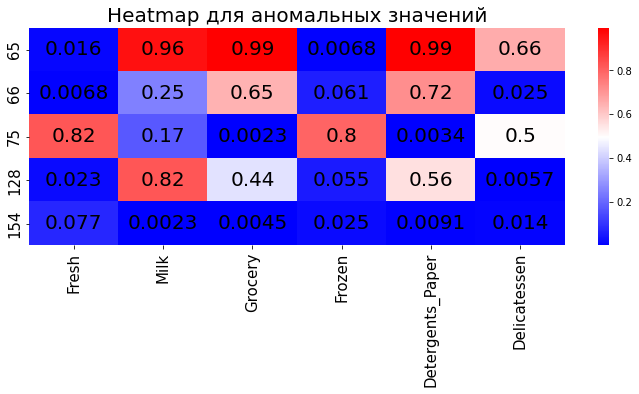

In [47]:
# визуализация для строк с аномальными значениями
# имопртирование графических бибилиотек
import pylab as pl, seaborn as sn
# .rank() подсчитывает процентный ранг для каждой записи
percentiles = customers.rank(pct=True)
# предположительный список индексов строк с аномальными значениями
outliers = [65, 66, 75, 128, 154]
# процентный ранг для записей этого списка
percentiles = percentiles.iloc[outliers,2:]
# размеры графической реализации (ширина, высота)
pl.figure(figsize=(12,4))
# размер шрифта для текста осей координат
pl.xticks(fontsize=15); pl.yticks(fontsize=15)
# название графика и размер его шрифта
pl.title('Heatmap для аномальных значений', fontsize=20)
# отображение информации в виде матрицы цветных квадратов
# цвет выбирается согласно численному значению 
# в цветовй гамме summer
sn.heatmap(percentiles, annot=True, cmap=pl.cm.bwr, 
           annot_kws={'color':'black', 'size':'20'});